In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

% matplotlib inline

# 1. Supervised learning

# 1.1. Generalized Linear Models:

1. Used for regression

2. Target value is a linear combination of the input variables

$$ \hat{y}(\omega,x)=\omega_0+\omega_1 x_1+ ... + \omega_n x_n $$

## 1.1.1. Linear Regression aka Ordinary Least Squares

$$ {\min_{\omega} \|X\omega - y \|_2}^2 $$

<span style="color:blue"> class </span>       ``sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)``

### Example 1:

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


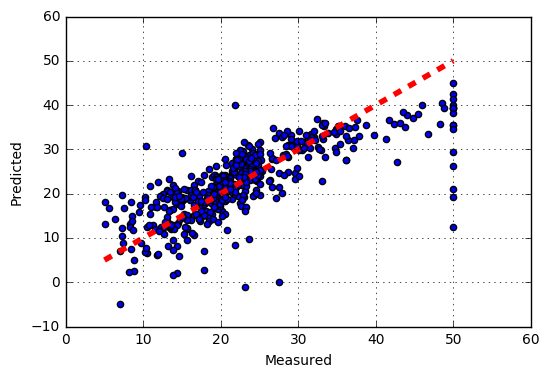

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
boston = load_boston()
y = boston.target

predicted = cross_val_predict(lr, boston.data, y, cv=10)
plt.scatter(y,predicted)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.grid()

### Example 2

Coefficient of LinearRegression:  [ 938.23786125]
Intercept:  152.918861826
Mean Sauared Error:  2548.07239873
Coeficient of Determination(R^2):  0.472575447982


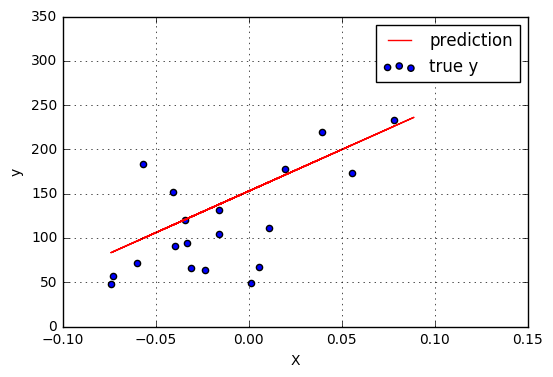

In [3]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

diabetes = load_diabetes()
X = diabetes.data[:,2].reshape(-1,1)
y = diabetes.target
X_train = X[:-20]
y_train = y[:-20]
X_test = X[-20:]
y_test = y[-20:]
lr = LinearRegression()
lr.fit(X_train, y_train)
print 'Coefficient of LinearRegression: ', lr.coef_
print 'Intercept: ', lr.intercept_
y_pred = lr.predict(X_test)
print 'Mean Sauared Error: ', mean_squared_error(y_test, y_pred)
print 'Coeficient of Determination(R^2): ', lr.score(X_test, y_test)
plt.scatter(X_test, y_test, label='true y')
plt.plot(X_test, y_pred, 'r', label= 'prediction')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.grid()

### 1.1.2. Ridge Regression

$$ {\min_{\omega} \|X\omega - y \|_2}^2 + \alpha {\|\omega\|_2}^2,\quad \alpha \geqslant 0$$

<span style="color:blue"> class </span> sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)

Here the coefficients are calculated such that the model pridict the target well while the magnitude of $\omega$ is as small as possible. 

alpha = 0.0001 	 coefficient is 938.139697014  	 and MSE is 2548.184
alpha = 0.001 	 coefficient is 937.257142359  	 and MSE is 2549.189
alpha = 0.01 	 coefficient is 928.522073575  	 and MSE is 2559.321
alpha = 0.1 	 coefficient is 849.362965656  	 and MSE is 2666.589
alpha = 1.0 	 coefficient is 458.488594672  	 and MSE is 3604.27
alpha = 10.0 	 coefficient is 81.8441575712  	 and MSE is 5149.792
alpha = 0 	 coefficient is 938.237861251  	 and MSE is 2548.072


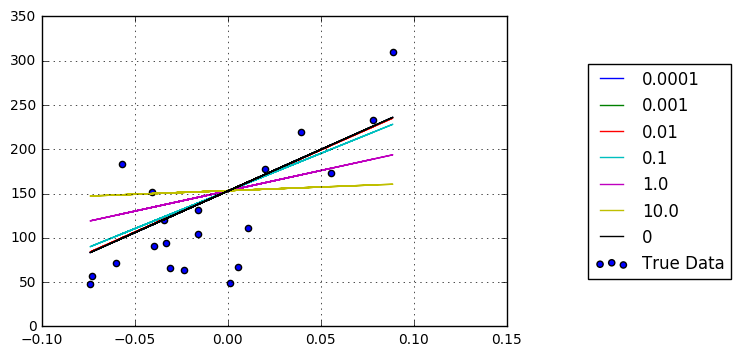

In [4]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

diabetes = load_diabetes()
X = diabetes.data[:,2].reshape(-1,1)
y = diabetes.target
X_train = X[:-20]
y_train = y[:-20]
X_test = X[-20:]
y_test = y[-20:]
plt.scatter(X_test, y_test, label='True Data')
alphas = list(np.logspace(-4, 1, 6))
alphas.append(0)
for a in alphas:
    ridge = Ridge(alpha = a)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    plt.plot(X_test,y_pred,  label= str(a))
    print 'alpha = {alpha} \t coefficient is {coef}  \t and MSE is {MSE}'.format(
        alpha=a,coef=ridge.coef_[0], MSE= round(mean_squared_error(y_test, y_pred),3))
    
plt.legend(bbox_to_anchor=(1.5, 0.5), loc='center right', ncol=1)
plt.grid()

### 1.1.3. Lasso

$$ {\min_{\omega} \frac{1}{2 n_{smaple}} \|X\omega - y \|_2}^2 + \alpha {\|\omega\|_1}$$

<span style="color:blue"> class </span> sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

alpha = 0.0001 	 coefficient is 938.193704386  	 and MSE is 2548.123
alpha = 0.001 	 coefficient is 937.7962926  	 and MSE is 2548.575
alpha = 0.01 	 coefficient is 933.822174736  	 and MSE is 2553.133
alpha = 0.1 	 coefficient is 894.080996097  	 and MSE is 2602.572
alpha = 1.0 	 coefficient is 496.66920971  	 and MSE is 3482.772
alpha = 10.0 	 coefficient is 0.0  	 and MSE is 5568.965


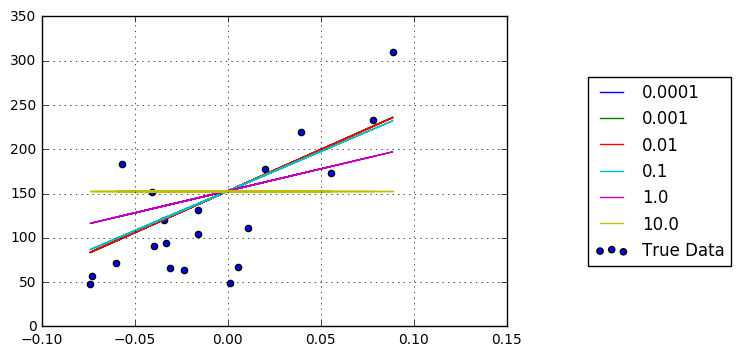

In [5]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

diabetes = load_diabetes()
X = diabetes.data[:,2].reshape(-1,1)
y = diabetes.target
X_train = X[:-20]
y_train = y[:-20]
X_test = X[-20:]
y_test = y[-20:]
plt.scatter(X_test, y_test, label='True Data')
alphas = list(np.logspace(-4, 1, 6))
for a in alphas:
    lasso = Lasso(alpha = a, max_iter=5000)
    lasso.fit(X_train,y_train)
    y_pred = lasso.predict(X_test)
    plt.plot(X_test,y_pred,  label= str(a))
    print 'alpha = {alpha} \t coefficient is {coef}  \t and MSE is {MSE}'.format(
        alpha=a,coef=lasso.coef_[0], MSE= round(mean_squared_error(y_test, y_pred),3))
    
plt.legend(bbox_to_anchor=(1.5, 0.5), loc='center right', ncol=1)
plt.grid()